In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

C:\Users\safya\anaconda3\envs\cudnn-PyTorch-cuda11.8\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
train_data = datasets.MNIST(
	root = 'data',
	train = True,
	transform = ToTensor(),
	download = True
)

test_data = datasets.MNIST(
	root = 'data',
	train = False,
	transform = ToTensor(),
	download = True
)

In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
print('train: ', train_data.data.shape)
print('train targets: ', train_data.targets.shape)
print('test: ', test_data.data.shape)
print('test targets: ', test_data.targets.shape)
test_data.targets

train:  torch.Size([60000, 28, 28])
train targets:  torch.Size([60000])
test:  torch.Size([10000, 28, 28])
test targets:  torch.Size([10000])


tensor([7, 2, 1,  ..., 4, 5, 6])

In [6]:

from torch.utils.data import DataLoader

loaders = {
	'train': DataLoader(train_data,
				batch_size = 100,
				shuffle = True,
				num_workers = 8),

	'test': DataLoader(test_data,
				batch_size = 100,
				shuffle = True,
				num_workers = 8),
}

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
		
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x , training = self.training)
        x = self.fc2(x)
        
        return F.softmax(x)
        
        

In [8]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\ntest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')

In [9]:
for epoch in range(1, 11):
    train(epoch)
    test()

C:\Users\safya\AppData\Local\Temp\ipykernel_13872\494925681.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.304229
Train Epoch: 1 [2000/60000 (3%)]	2.286080
Train Epoch: 1 [4000/60000 (7%)]	2.135796
Train Epoch: 1 [6000/60000 (10%)]	1.981317
Train Epoch: 1 [8000/60000 (13%)]	1.865752
Train Epoch: 1 [10000/60000 (17%)]	1.768869
Train Epoch: 1 [12000/60000 (20%)]	1.789777
Train Epoch: 1 [14000/60000 (23%)]	1.805172
Train Epoch: 1 [16000/60000 (27%)]	1.747358
Train Epoch: 1 [18000/60000 (30%)]	1.752688
Train Epoch: 1 [20000/60000 (33%)]	1.654087
Train Epoch: 1 [22000/60000 (37%)]	1.680662
Train Epoch: 1 [24000/60000 (40%)]	1.679622
Train Epoch: 1 [26000/60000 (43%)]	1.651850
Train Epoch: 1 [28000/60000 (47%)]	1.641885
Train Epoch: 1 [30000/60000 (50%)]	1.638906
Train Epoch: 1 [32000/60000 (53%)]	1.625727
Train Epoch: 1 [34000/60000 (57%)]	1.641008
Train Epoch: 1 [36000/60000 (60%)]	1.642972
Train Epoch: 1 [38000/60000 (63%)]	1.600925
Train Epoch: 1 [40000/60000 (67%)]	1.644028
Train Epoch: 1 [42000/60000 (70%)]	1.600742
Train Epoch: 1 [44000/60000 (73%)]	1.575119

C:\Users\safya\AppData\Local\Temp\ipykernel_13872\494925681.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


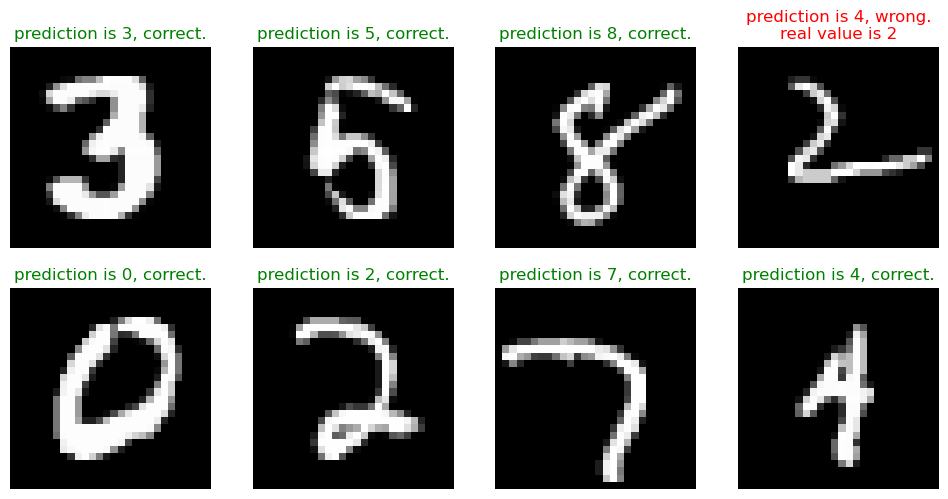

In [42]:
import matplotlib.pyplot as plt
import random 

plt.figure(figsize=(12, 12))
for i in range(0, 8):
    plt.subplot(4, 4, i+1)
    random_2 = random.randint(0, 10000)
    
    model.eval()
    data, target = test_data[random_2]
    data = data.unsqueeze(0).to(device)
    output = model(data)
    prediction = output.argmax(dim = 1, keepdim=True).item()
    image = data.squeeze(0).squeeze(0).cpu().numpy()


    
    plt.imshow(image, cmap='gray')
    plt.axis(False)
    if (prediction == target):
        plt.title('prediction is {}, correct.'.format(prediction), color='green')
    else:
        plt.title('prediction is {}, wrong.\nreal value is {}'.format(prediction, target), color='red')

In [43]:
import numpy as np

target_label = test_data.targets.numpy()
predicted_label = np.arange(len(target_label))

for i in range(0, 10000):
    model.eval()
    data, target = test_data[i]

    data = data.unsqueeze(0).to(device)

    output = model(data)

    prediction = output.argmax(dim = 1, keepdim=True).item()
    predicted_label[i] = prediction
    
 #   print(f'{i} index is predicted: {predicted_label[i]} and target: {target_label[i]}') # incase to check for errors manually
    

C:\Users\safya\AppData\Local\Temp\ipykernel_13872\494925681.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


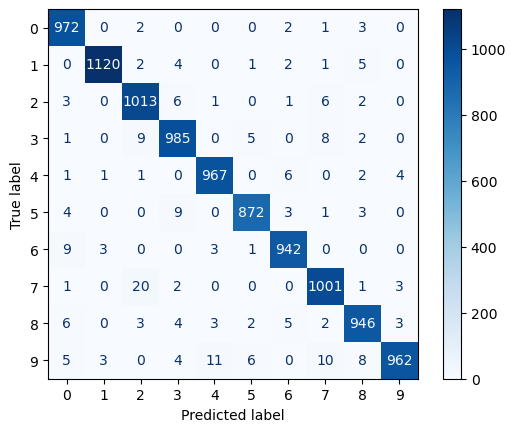

In [44]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(target_label, predicted_label)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot(cmap=plt.cm.Blues)
plt.show()